<a href="https://colab.research.google.com/github/uma1978/iiit_fmml_assignments/blob/main/Copy_of_outlier_remove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating a random distribution of numbers(sample data) to generate outliers random data 

def create_numbers(mu=54, sigma=15, num_samples=100, seed=42):
    np.random.seed(seed)

    sample_numbers = np.random.normal(loc=mu, scale=sigma, size=num_samples) #create a normal distribution
    sample_numbers = np.round(sample_numbers, decimals=0)

    return sample_numbers

In [ ]:
#these are 100 random values choosen by the system
sample = create_numbers()
sample

array([61., 52., 64., 77., 50., 50., 78., 66., 47., 62., 47., 47., 58.,
       25., 28., 46., 39., 59., 40., 33., 76., 51., 55., 33., 46., 56.,
       37., 60., 45., 50., 45., 82., 54., 38., 66., 36., 57., 25., 34.,
       57., 65., 57., 52., 49., 32., 43., 47., 70., 59., 28., 59., 48.,
       44., 63., 69., 68., 41., 49., 59., 69., 47., 51., 37., 36., 66.,
       74., 53., 69., 59., 44., 59., 77., 53., 77., 15., 66., 55., 50.,
       55., 24., 51., 59., 76., 46., 42., 46., 68., 59., 46., 62., 55.,
       69., 43., 49., 48., 32., 58., 58., 54., 50.])

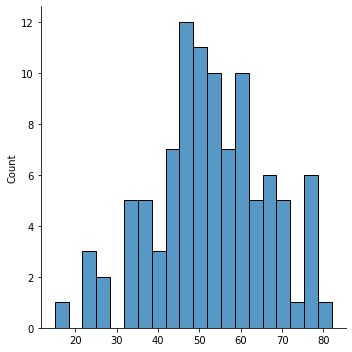

In [ ]:
sns.displot(sample, bins=20)

from this normal density curve we cannot clearly find the outliers
so we see any outliers are there in boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


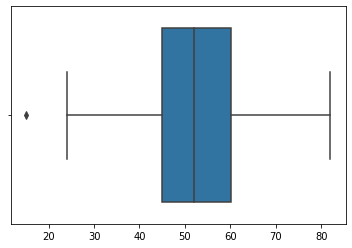

In [ ]:
sns.boxplot(sample)


#clearly we have one outlier out of the boxplot
  




In [ ]:
# showing the data in table of rows and columns as earler it was done in array notation
ser = pd.Series(sample)
ser


0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

here we want to know the values of the boxplot so that we can understand the mean ,std, Q25, median, Q75, min and  max values

In [ ]:
ser.describe()

count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

just evaluating the iqr and lower limit using formula

In [ ]:
IQR = 60.25 - 45.0
print(IQR)
lower_limit = 45.0 - 1.5*(IQR)
print(lower_limit)

15.25
22.125


In [ ]:
upper_limit = 60.25 + 1.5*(IQR)
upper_limit


83.125

In [ ]:
ser[ser<lower_limit]

74    15.0
dtype: float64

In [ ]:
ser[ser>upper_limit]

Series([], dtype: float64)

only one data point is less than the lower limit which  we can all as outlier and no value is greater than upper limit so we need to remove the value 15 of data no74

In [ ]:
ser[ser>upper_limit]


Series([], dtype: float64)

In [ ]:
with open(r'/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

this is the origial data set having more categorical values as well as numerical values  and so many missing values too no we are trying to remove and knowing the which feature engineering
this methods are not suitable for all data sets the techniques were not universal based on the data set we need to apply new techniques


In [ ]:
df = pd.read_csv(r'/Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


it is very difficult to know which features are correlaated now we will see the the features are correlated with target value sales which is meaning ful



In [ ]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [ ]:
df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

from the above ground live area overall quality  are more correlated to sales

visualisation is very important after performing the prepocessing  step here it is correlation between overall quality and salesprice more quality more price 


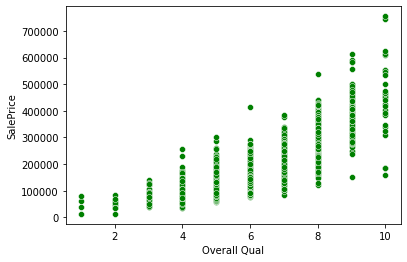

In [ ]:
sns.scatterplot(x = 'Overall Qual', y='SalePrice', data=df, color='green')


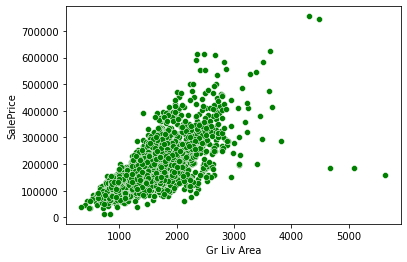

In [ ]:
sns.scatterplot(x = 'Gr Liv Area', y='SalePrice', data=df, color='green')

if you observe the above plot you can understand there are three outliers as great living area increases the salesprice is decreasing which doesnt happen so now our task is to remove these outliers



In [ ]:
df[(df['Overall Qual']>8) & (df['SalePrice']< 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']< 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


if we  observe the above two tables we can understand how we can extract outliers the index numbeers 1498 ,2180,2181 are outliers  

In [ ]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']< 400000)].index

In [ ]:
df = df.drop(drop_ind, axis=0)#drop index  from data df since we want to remove rows we kept axis=0

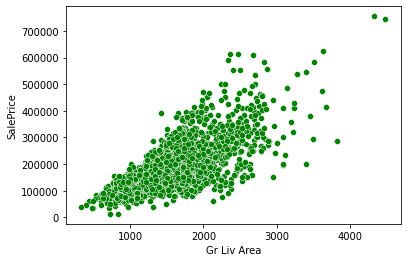

In [ ]:
sns.scatterplot(x = 'Gr Liv Area', y='SalePrice', data=df, color='green')

if you observe the above graphs we removed the outliers from greater living to sales

after dropping the values we check the databasse it was removed

In [ ]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']< 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
#now we are loading the data sets which removed outliers to handle the missing values 

In [ ]:
df=pd.read_csv(r'/Ames_outliers_removed.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [ ]:
len(df)

2927

In [ ]:
(df.isnull().sum()/len(df))*100


PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

In [ ]:
def percent_missing(df):
    percent_nan = (df.isnull().sum()/len(df))*100
    percent_nan = percent_nan[percent_nan>0].sort_values() # percentage missing is more than 0%

    return percent_nan

In [ ]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

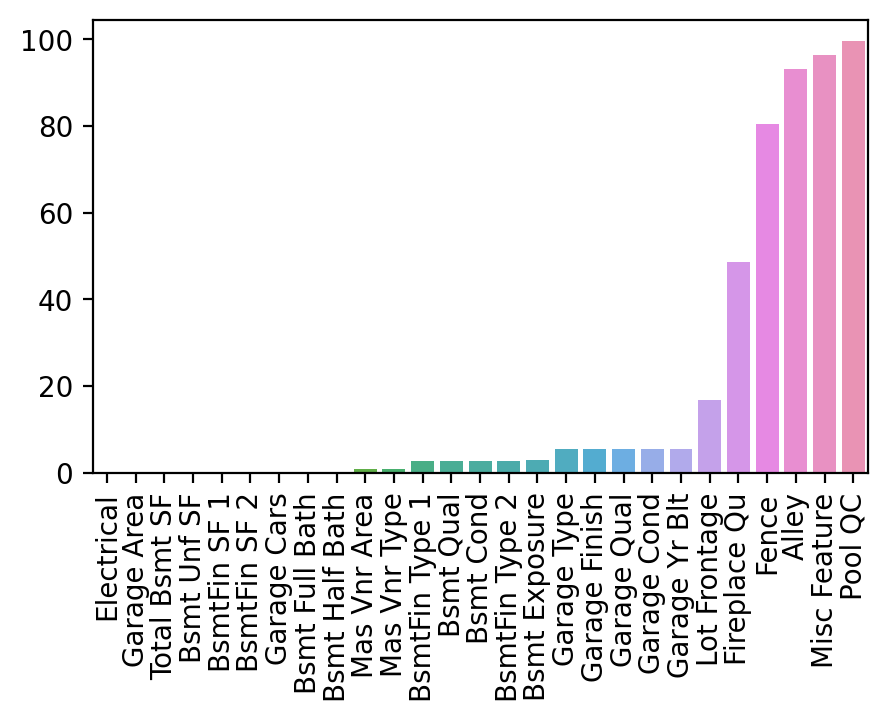

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan)
plt.xticks(rotation=90)

In [ ]:
df[df['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


we remove all the missing values one and two rows i.e., from electrical to garage cars which can be visualized from the above graph

In [ ]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

(0.0, 1.0)

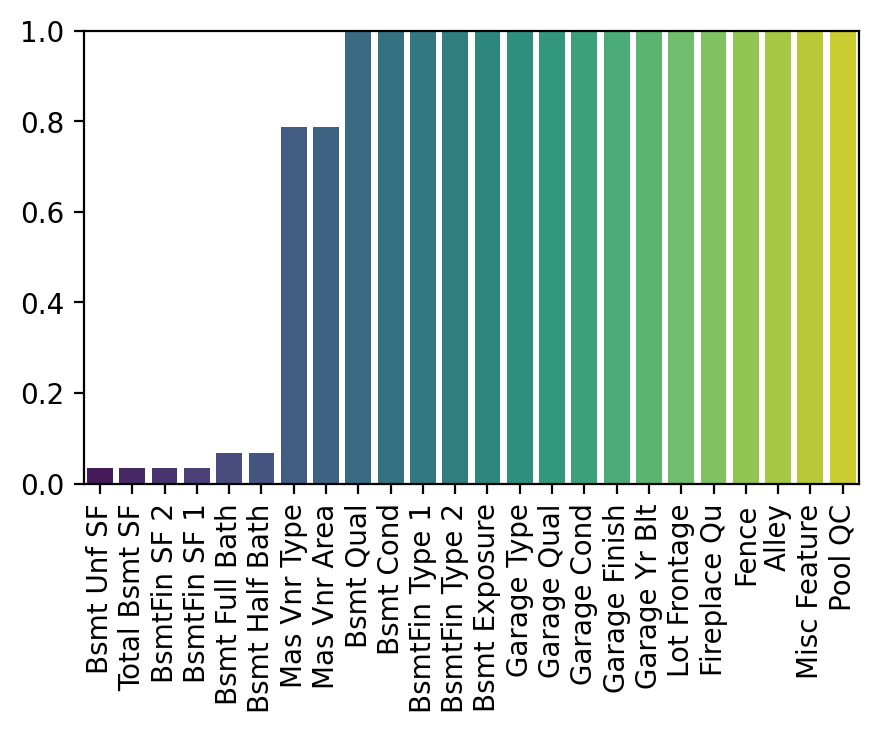

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

verifying which index rows having null values in bsmt half bath feature using .isnull

In [ ]:
df[df['Bsmt Half Bath'].isnull()]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']


In [ ]:
df[df['Bsmt Full Bath'].isnull()]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
percent_nan = percent_missing(df)


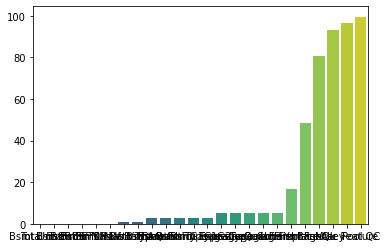

In [ ]:
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')


if you compare to graphs in the below graph missing values at 1% is also visulized that indicates there are one row missing values

(0.0, 1.0)

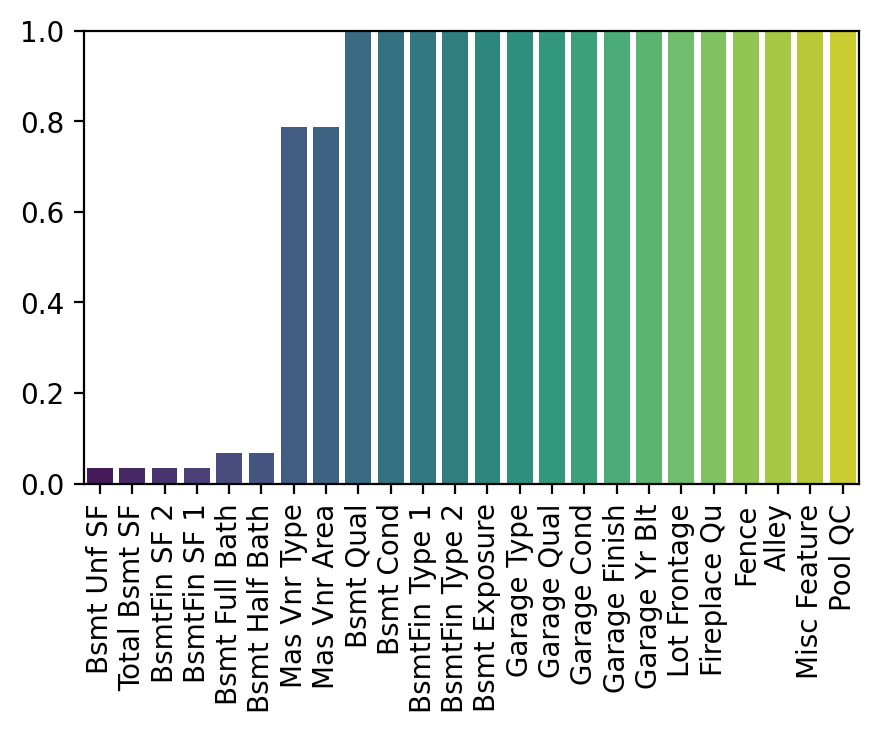

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

# New Section